In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import prefect
from prefect.engine.results import S3Result

import pandas as pd

### Homemade
from moc_data_flow import tsx_imb_fl


### Inputs
s3_bucket_name = "results-prefect-tst"

## Flow
1. Scrape website
2. Partition df
3. Load to db

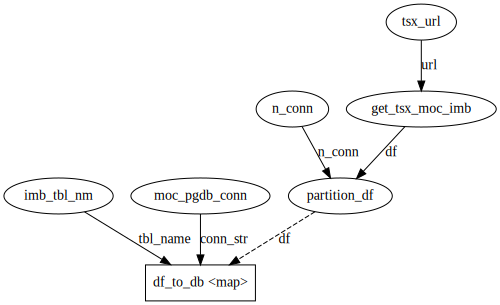

In [3]:
tsx_imb_fl.visualize()

## Read cached result from scrape website task

In [4]:
s3_result = S3Result(bucket=s3_bucket_name)
tsx_imb_df = s3_result.read(location='Get-Imbalances/get_tsx_moc_imb').value
tsx_imb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, AAV to Y
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Imbalance Side             389 non-null    object 
 1   Imbalance Size             389 non-null    int64  
 2   Imbalance Reference Price  389 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 12.2+ KB


In [5]:
print(f"TSX df shape: {tsx_imb_df.shape}")
tsx_imb_df.head(2)

TSX df shape: (389, 3)


,Imbalance Side,Imbalance Size,Imbalance Reference Price
Symbol,,,
AAV,BUY,34003,1.725
ABX,BUY,460592,34.005


## Great Expectations

In [6]:
import great_expectations as ge

### Load dataframe into ge object

In [7]:
imb_df_ge = ge.dataset.PandasDataset(tsx_imb_df)
imb_df_ge.info()

<class 'great_expectations.dataset.pandas_dataset.PandasDataset'>
Index: 389 entries, AAV to Y
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Imbalance Side             389 non-null    object 
 1   Imbalance Size             389 non-null    int64  
 2   Imbalance Reference Price  389 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 12.2+ KB


- In the command line initialize and define where the data needs to be compared/sourced from.
 - Maybe this should be configured in toml?

In [9]:
tsx_imb_df.to_json("~/prefect_guide/results/tsx_imb.json", orient="records", double_precision=3)